# CIBMTR - Equity in post-HCT Survival Predictions

## Import our data

In [32]:
import pandas as pd

In [33]:
test_date_dir = 'Data/test.csv'
train_data_dir = 'Data/train.csv'
dictionary_dir = 'Data/data_dictionary.csv'

In [34]:
train_df = pd.read_csv(train_data_dir)
test_df = pd.read_csv(test_date_dir)
dictionary_df = pd.read_csv(dictionary_dir)

## Explore the data

In [35]:
import matplotlib.pyplot as plt

In [36]:
train_df

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,NaN,Favorable,No,2.0,8.0,No TBI,No,6.0,...,Bi-directional non-permissive,NaN,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,18.633
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,...,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0,4.892
28797,28797,TBD cytogenetics,NaN,Poor,NaN,2.0,8.0,No TBI,NaN,6.0,...,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,23.157
28798,28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,...,Permissive mismatched,Related,MEL,4.0,No,1.0,No,5.0,0.0,52.351


In [37]:
dictionary_df

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [39]:
train_df.isnull().sum()


ID                            0
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct 

## Handling missing values

In [40]:
import random

def clean_data(df):
    # Handling missing values in the `dri_score` column by the most frequent value
    df['dri_score'] = df['dri_score'].fillna(df['dri_score'].mode()[0])
    # Replace missing values with the most common value of each column in: 'psych_disturb'
    df = df.fillna({'psych_disturb': df['psych_disturb'].mode()[0]})
    # Handling missing values in the `cyto_score` column by a random value in the column
    df['cyto_score'] = df['cyto_score'].fillna(df['cyto_score'].sample(1).values[0])
    # Handling missing values in the `diabetes` column by the most frequent value
    df['diabetes'] = df['diabetes'].fillna(df['diabetes'].mode()[0])
    # Fill missing values in 'hla_match_c_high' with random values from the same column
    non_nulls = df['hla_match_c_high'].dropna().values
    df['hla_match_c_high'] = df['hla_match_c_high'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_high_res_8` column by random values from the column
    non_nulls = df['hla_high_res_8'].dropna().values
    df['hla_high_res_8'] = df['hla_high_res_8'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `arrhythmia` column by random values from the column
    non_nulls = df['arrhythmia'].dropna().values
    df['arrhythmia'] = df['arrhythmia'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_low_res_6` column by random values from the column
    non_nulls = df['hla_low_res_6'].dropna().values
    df['hla_low_res_6'] = df['hla_low_res_6'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Replace missing values with the most common value of each column in: 'vent_hist'
    df = df.fillna({'vent_hist': df['vent_hist'].mode()[0]})
    # Fill missing values for `renal_issue` column by random values from the column
    non_nulls = df['renal_issue'].dropna().values
    df['renal_issue'] = df['renal_issue'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `pulm_severe` column by random values from the column
    nom_nulls = df['pulm_severe'].dropna().values
    df['pulm_severe'] = df['pulm_severe'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_high_res_6` column by random values from the column
    non_nulls = df['hla_high_res_6'].dropna().values
    df['hla_high_res_6'] = df['hla_high_res_6'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Replace missing values with the most common value of each column in: 'cmv_status'
    df = df.fillna({'cmv_status': df['cmv_status'].mode()[0]})
    # Fill missing values for `tce_imm_match` column by random values from the column
    non_nulls = df['tce_imm_match'].dropna().values
    df['tce_imm_match'] = df['tce_imm_match'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_nmdp_6` column by random values from the column
    non_nulls = df['hla_nmdp_6'].dropna().values
    df['hla_nmdp_6'] = df['hla_nmdp_6'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_match_c_low` column by random values from the column
    non_nulls = df['hla_match_c_low'].dropna().values
    df['hla_match_c_low'] = df['hla_match_c_low'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `rituximab` column by random values from the column
    non_nulls = df['rituximab'].dropna().values
    df['rituximab'] = df['rituximab'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_high_res_8` column by random values from the column
    non_nulls = df['hla_match_drb1_low'].dropna().values
    df['hla_match_drb1_low'] = df['hla_match_drb1_low'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_match_dqb1_low` column by random values from the column
    non_nulls = df['hla_match_dqb1_low'].dropna().values
    df['hla_match_dqb1_low'] = df['hla_match_dqb1_low'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `cyto_score_detail` column by random values from the column
    non_nulls = df['cyto_score_detail'].dropna().values
    df['cyto_score_detail'] = df['cyto_score_detail'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `cyto_score` column by random values from the column
    non_nulls = df['cyto_score'].dropna().values
    df['cyto_score'] = df['cyto_score'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_high_res_10` column by random values from the column
    non_nulls = df['hla_high_res_10'].dropna().values
    df['hla_high_res_10'] = df['hla_high_res_10'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_match_dqb1_high` column by random values from the column
    non_nulls = df['hla_match_dqb1_high'].dropna().values
    df['hla_match_dqb1_high'] = df['hla_match_dqb1_high'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `conditioning_intensity` column by random values from the column
    non_nulls = df['conditioning_intensity'].dropna().values
    df['conditioning_intensity'] = df['conditioning_intensity'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `ethnicity` column by random values from the column
    non_nulls = df['ethnicity'].dropna().values
    df['ethnicity'] = df['ethnicity'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `obesity` column by random values from the column
    non_nulls = df['obesity'].dropna().values
    df['obesity'] = df['obesity'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `mrd_hct` column by random values from the column
    non_nulls = df['mrd_hct'].dropna().values
    df['mrd_hct'] = df['mrd_hct'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Replace missing values with the most common value of each column in: 'in_vivo_tcd'
    df = df.fillna({'in_vivo_tcd': df['in_vivo_tcd'].mode()[0]})
    # Fill missing values for `tce_match` column by random values from the column
    non_nulls = df['tce_match'].dropna().values
    df['tce_match'] = df['tce_match'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_match_a_high` column by random values from the column
    non_nulls = df['hla_match_a_high'].dropna().values
    df['hla_match_a_high'] = df['hla_match_a_high'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hepatic_severe` column by random values from the column
    non_nulls = df['hepatic_severe'].dropna().values
    df['hepatic_severe'] = df['hepatic_severe'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `donor_age` column by random values from the column
    non_nulls = df['donor_age'].dropna().values
    df['donor_age'] = df['donor_age'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `prior_tumor` column by random values from the column
    non_nulls = df['prior_tumor'].dropna().values
    df['prior_tumor'] = df['prior_tumor'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_match_b_low` column by random values from the column
    non_nulls = df['hla_match_b_low'].dropna().values
    df['hla_match_b_low'] = df['hla_match_b_low'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `peptic_ulcer` column by random values from the column
    non_nulls = df['peptic_ulcer'].dropna().values
    df['peptic_ulcer'] = df['peptic_ulcer'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_match_a_low` column by random values from the column
    non_nulls = df['hla_match_a_low'].dropna().values
    df['hla_match_a_low'] = df['hla_match_a_low'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Replace missing values with the most common value of each column in: 'gvhd_proph'
    df = df.fillna({'gvhd_proph': df['gvhd_proph'].mode()[0]})
    # Fill missing values for `rheum_issue` column by random values from the column
    non_nulls = df['rheum_issue'].dropna().values
    df['rheum_issue'] = df['rheum_issue'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Replace missing values with the most common value of each column in: 'sex_match'
    df = df.fillna({'sex_match': df['sex_match'].mode()[0]})
    # Fill missing values for `hla_match_b_high` column by random values from the column
    non_nulls = df['hla_match_b_high'].dropna().values
    df['hla_match_b_high'] = df['hla_match_b_high'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `comorbidity_score` column by random values from the column
    non_nulls = df['comorbidity_score'].dropna().values
    df['comorbidity_score'] = df['comorbidity_score'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `karnofsky_score` column by random values from the column
    non_nulls = df['karnofsky_score'].dropna().values
    df['karnofsky_score'] = df['karnofsky_score'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hepatic_mild` column by random values from the column
    non_nulls = df['hepatic_mild'].dropna().values
    df['hepatic_mild'] = df['hepatic_mild'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `tce_div_match` column by random values from the column
    non_nulls = df['tce_div_match'].dropna().values
    df['tce_div_match'] = df['tce_div_match'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Replace missing values with the most common value of each column in: 'donor_related'
    df = df.fillna({'donor_related': df['donor_related'].mode()[0]})
    # Fill missing values for `melphalan_dose` column by random values from the column
    non_nulls = df['melphalan_dose'].dropna().values
    df['melphalan_dose'] = df['melphalan_dose'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_low_res_8` column by random values from the column
    non_nulls = df['hla_low_res_8'].dropna().values
    df['hla_low_res_8'] = df['hla_low_res_8'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `cardiac` column by random values from the column
    non_nulls = df['cardiac'].dropna().values
    df['cardiac'] = df['cardiac'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_match_drb1_high` column by random values from the column
    non_nulls = df['hla_match_drb1_high'].dropna().values
    df['hla_match_drb1_high'] = df['hla_match_drb1_high'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `pulm_moderate` column by random values from the column
    non_nulls = df['pulm_moderate'].dropna().values
    df['pulm_moderate'] = df['pulm_moderate'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    # Fill missing values for `hla_low_res_10` column by random values from the column
    non_nulls = df['hla_low_res_10'].dropna().values
    df['hla_low_res_10'] = df['hla_low_res_10'].apply(lambda x: random.choice(non_nulls) if pd.isnull(x) else x)
    df = df.drop(columns=['efs_time'])
    df = df.drop(columns=['ID'])
    return df

df_clean = clean_data(train_df.copy())
df_clean

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs
0,N/A - non-malignant indication,No,Favorable,No,1.0,4.0,No TBI,No,6.0,Bone marrow,...,No,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0
2,N/A - non-malignant indication,No,Favorable,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0
4,High,No,Favorable,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,Intermediate - TED AML case <missing cytogenetics,No,Favorable,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,No,Bi-directional non-permissive,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0
28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,Peripheral blood,...,No,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0
28797,TBD cytogenetics,No,Poor,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,No,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0
28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,Peripheral blood,...,No,Permissive mismatched,Related,MEL,4.0,No,1.0,No,5.0,0.0


In [41]:
train_features = df_clean.copy()
train_labels = train_features.pop('efs')

## Encoding the categorical columns

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np

In [43]:
inputs = {}

for name, column in train_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs


{'dri_score': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=dri_score>,
 'psych_disturb': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=psych_disturb>,
 'cyto_score': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=cyto_score>,
 'diabetes': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=diabetes>,
 'hla_match_c_high': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=hla_match_c_high>,
 'hla_high_res_8': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=hla_high_res_8>,
 'tbi_status': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=tbi_status>,
 'arrhythmia': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=arrhythmia>,
 'hla_low_res_6': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=hla_low_res_6>,
 'graft_type': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=graft_type>,
 'vent_hist': <KerasTensor shape=(None, 1), dtype=string, spa

In [44]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(df_clean[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor shape=(None, 22), dtype=float32, sparse=False, name=keras_tensor_10>

In [45]:
preprocessed_inputs = [all_numeric_inputs]

In [46]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(train_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

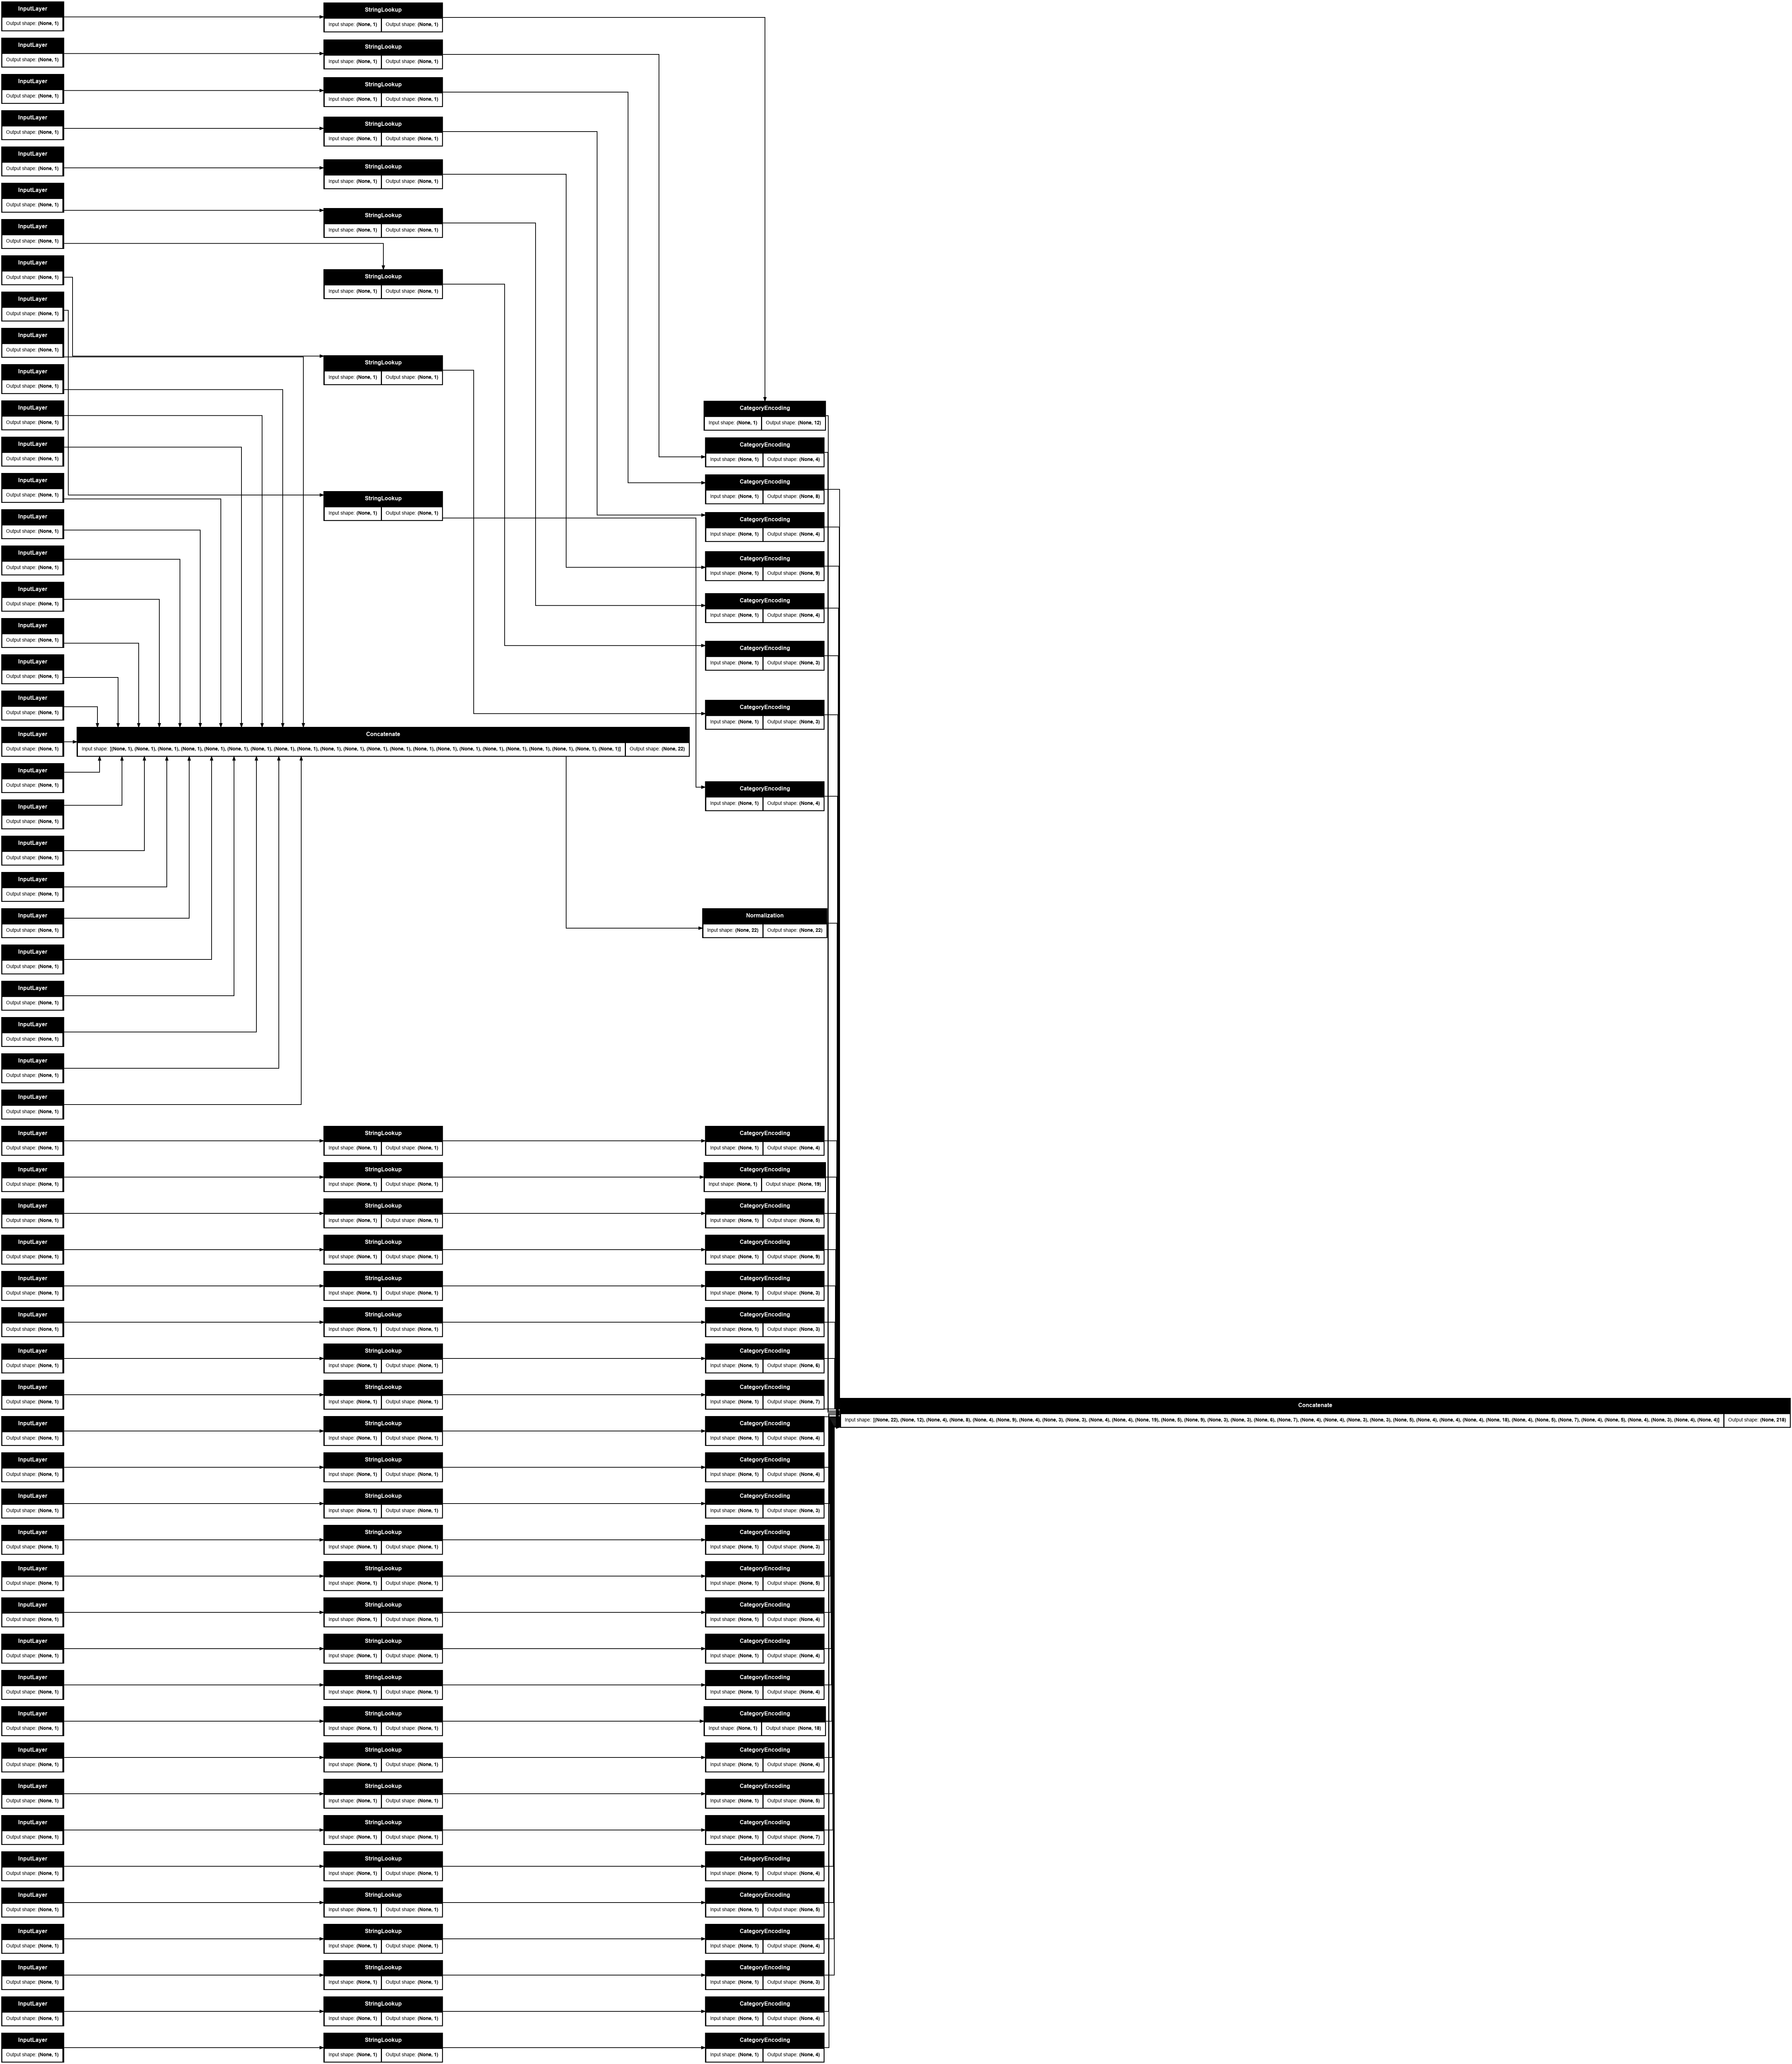

In [47]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [48]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in train_features.items()}

In [49]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 218), dtype=float32, numpy=
array([[-1.7628367 , -1.8388448 ,  0.7105595 ,  0.7309895 ,  0.7245163 ,
         0.58887887,  0.69740653,  0.55439615,  0.63269377,  0.5292677 ,
         0.26017544,  0.6424177 ,  0.3109118 ,  0.6151485 , -1.3581535 ,
         0.6345949 ,  0.6456722 , -0.8534383 ,  0.5596479 ,  0.70068616,
         0.63532215,  0.71086836,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
 

In [50]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [51]:
titanic_model.fit(x=titanic_features_dict, y=train_labels, epochs=10)

Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.6252
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5985
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5855
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5894
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5811
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5770
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5707
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5669
Epoch 9/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5626
Epoch 10/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5541
